# Lista 5 - Métodos de Monte Carlo II

### Caio Vítor de S. Soares

### Março, 2021

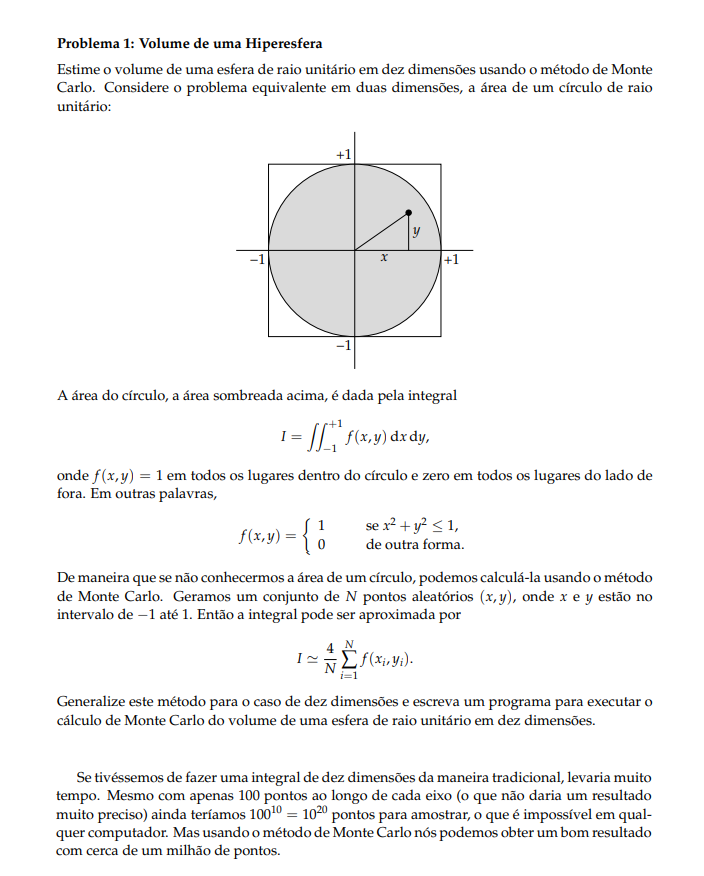

In [2]:
from random import random,randrange,seed
import matplotlib.pyplot as plt
from numpy import sqrt,arange,pi,sin,cos
seed(22)
n = 2
V = (1 - (-1))**n

def f(x,y):
    return x**2 + y**2

def negpos(x):#funçao q aumenta o alcance para números negativos, já que precisamos de x e y indo de -1 a 1;
    D = randrange(0,2)
    if D == 0:
        d = 1
    else:
        d = -1
    return d

S = []
Y = []
X = []
YY = []
XX = []
N = 100000
count = 0
for i in range(N):
    xi = negpos(i)*random()
    yi = negpos(i)*random()
    F = f(xi,yi)
    if F<=1:
        count+=1
        Y.append(yi)
        X.append(xi)
        S.append(f(xi,yi))
s=sum(S)
I=(V/N)*count
print("I =", I)


for theta in arange(0,2*pi,0.01):
    y = sin(theta)
    x = cos(theta)
    XX.append(x)
    YY.append(y)

def opt_plot():#cortesia de Gabriel Wendell
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,
                    labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,
                    labelsize=15)


    
fig = plt.figure(figsize = (12,12))
plt.title("Integração de Monte Carlo - Área do círculo unitário",fontsize = 15)
plt.xlabel("x",fontsize = 18)
plt.ylabel("y",fontsize = 18)
plt.plot(XX,YY,color='r',label="f(x)")
plt.scatter(Y,X,s=2,label="pontos dentro do círculo")
plt.legend(fontsize = 12)
opt_plot()
plt.show()

I = 3.1334000000000004


<Figure size 1200x1200 with 1 Axes>

In [3]:
#Agora vamos fazer a mesma coisa, porém para 10 dimensões.

n = 10
V = (1 - (-1))**n
def f(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10):
    return x1**2 + x2**2 + x3**2 + x4**2 + x5**2 + x6**2 + x7**2 + x8**2 + x9**2 + x10**2

S = []

N = 100000
count = 0
for i in range(N):
    x1 = negpos(i)*random()
    x2 = negpos(i)*random()
    x3 = negpos(i)*random()
    x4 = negpos(i)*random()
    x5 = negpos(i)*random()
    x6 = negpos(i)*random()
    x7 = negpos(i)*random()
    x8 = negpos(i)*random()
    x9 = negpos(i)*random()
    x10 = negpos(i)*random()
    
    F = f(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)
    if F<=1:
        count+=1
        S.append(F)
s=sum(S)
I=(V/N)*count
print(I)
sigma = sqrt(I*(V-I)/N)
print(sigma)

2.44736
0.1581172687921974


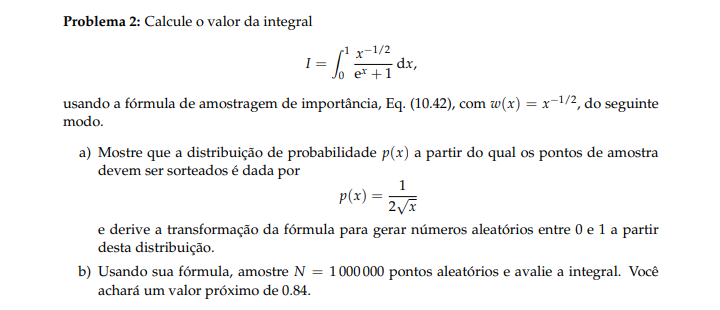

Para transformar uma distribuição uniforme numa distribuição não-uniforme de função de probabilidade $p(x)$, usamos:
    

   ## $$ \int_{-\infty}^{x(z)} p(x)dx = z $$ 

no nosso caso:
    
   ## $$p(x) = \frac{1}{2\sqrt{x}}$$ 

Portanto, teremos:
    
   ## $$ \int_{0}^{x(z)} \frac{1}{2\sqrt{x}} dx = z$$

   ## $$ \sqrt{x} = z \rightarrow x = z^2$$

In [4]:
e = 2.7182818284
N = 100000
s = 0
def f(x):
    return(x**-0.5)/(e**x + 1)
def w(x):
    return x**-0.5
for i in range (N):
    z = random()
    xi = z**2 #------------------------distribuição não-uniforme
    s += (f(xi)/w(xi))
I = (2/N)*s
print("Integral calculada pelo método:",I)
print("Integral calculada no Wolfram",0,83893)

Integral calculada pelo método: 0.8378278357154485
Integral calculada no Wolfram 0 83893


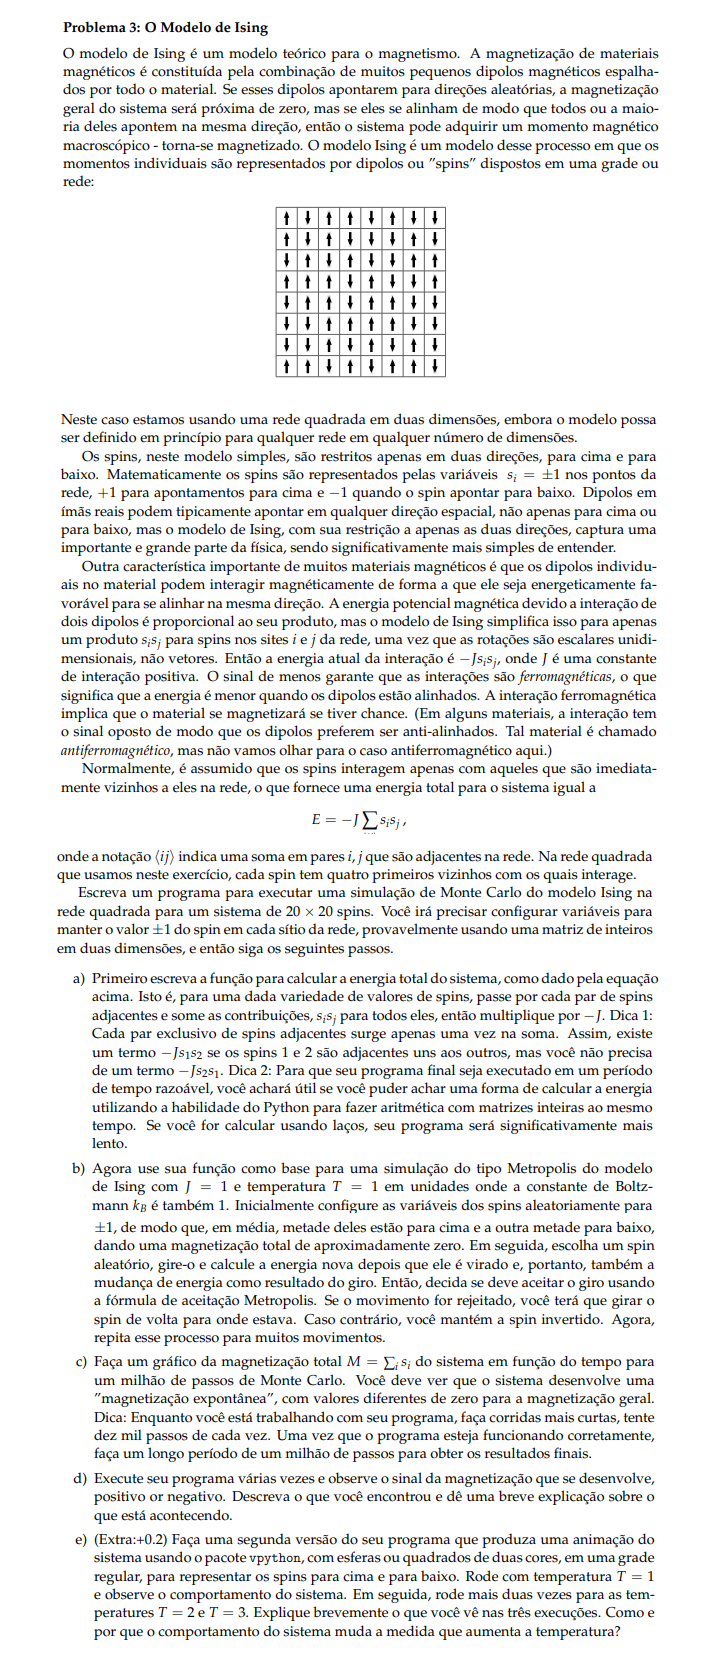

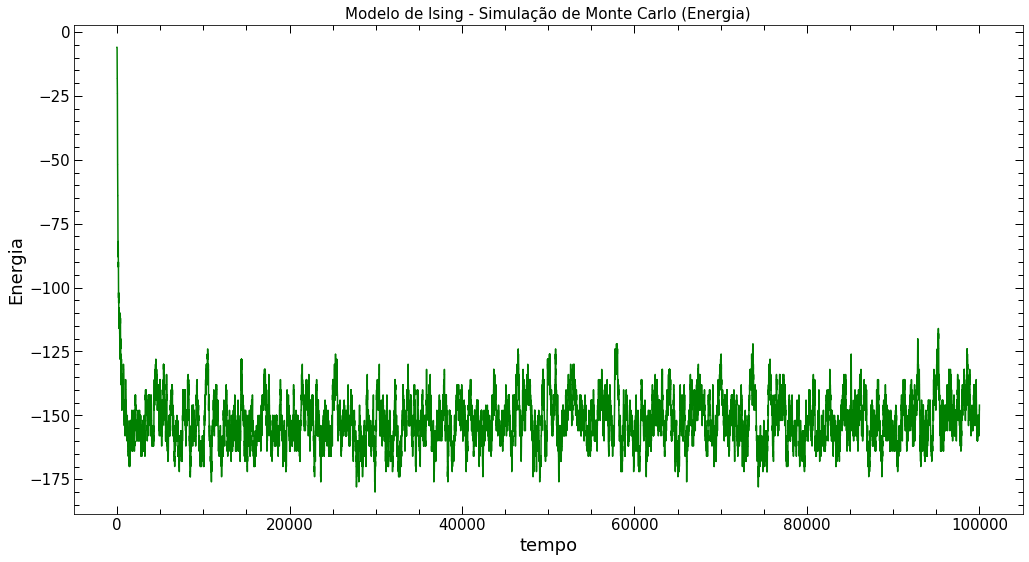

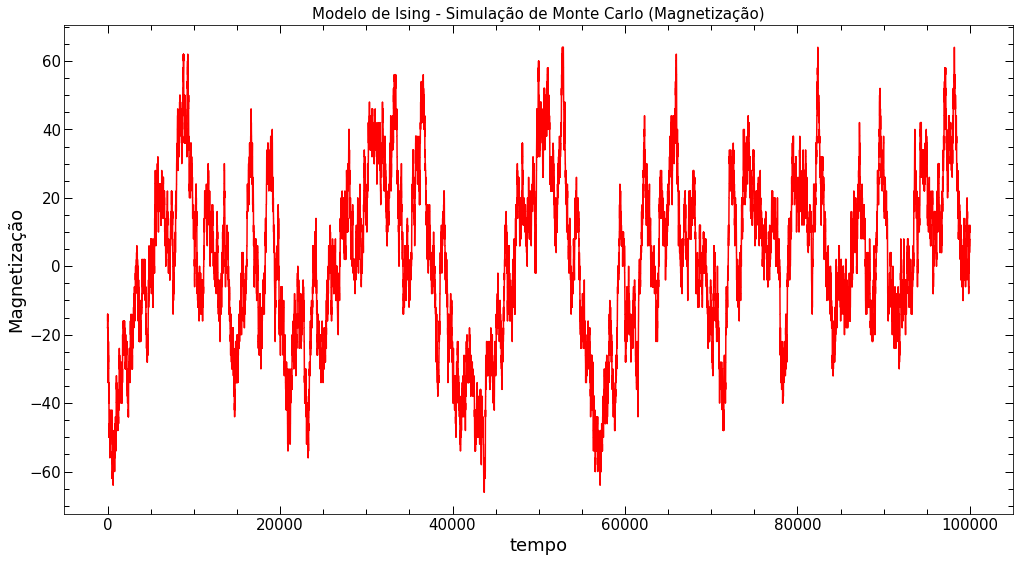

In [5]:
from numpy import* 
from numpy.fft import rfft
L = 20
J = 1
Ns = 100000
stp = 21*21
Ev = zeros(Ns,int)
Mag = zeros(Ns,int)
Beta = 1
def inicio(M):
    for i in range(L):
        for j in range(L):
            a = randrange(0,2)
            if a == 0:
                M[i,j] = -1
            if a == 1:
                M[i,j] = 1
    return M

def energy(M):
    E = 0
    for i in range(L):
        for j in range(0,L,2):
            E+= M[i,j]*M[i,j+1]
            #print(i,j,"--",i,j+1)
    return (-J)*E

M = zeros([L,L],int)
M = inicio(M)
Ek = energy(M)
Ev[0] = (Ek)
mag = sum(sum(M))
Mag[0] = (mag)
#print(mag,Ek,M)
def metropolis(M,Ek):
    x = randrange(0,L)
    y = randrange(0,L)
    M[x,y]*= -1
    E = energy(M)
    ΔE = E - Ek 
    
    if ΔE<0:
        P = 1
    else:
        P = exp(-Beta*(ΔE))
    randooom = (randrange(0,1000))/1000
    if randooom>=P:
        M[x,y]*= -1
        Enew = Ek
    if randooom<P:
        Enew = E
    
    return M, Enew

for k in range(Ns):
    M,Ek = metropolis(M,Ek)
    Ev[k] = (Ek)
    mag = sum(sum(M))
    Mag[k] = (mag)
    #print(Ev)
#print((1/Ns)*sum(Ev))
#print(Ev)

T = zeros(Ns,int)
for i in range(Ns):
    T[i] = i

fig = plt.figure(figsize = (17,9))
plt.title("Modelo de Ising - Simulação de Monte Carlo (Energia)",fontsize = 15)
plt.xlabel("tempo",fontsize = 18)
plt.ylabel("Energia",fontsize = 18)
plt.plot(T,Ev,color='g')
opt_plot()
plt.show()    
    
fig = plt.figure(figsize = (17,9))
plt.title("Modelo de Ising - Simulação de Monte Carlo (Magnetização)",fontsize = 15)
plt.xlabel("tempo",fontsize = 18)
plt.ylabel("Magnetização",fontsize = 18)
plt.plot(T,Mag,color='r')
opt_plot()
plt.show()

A magnetização fica então oscilando periodicamente em torno de 0, enquanto a energia vai claramente tendendo a estabilizar próximo de um valor médio.

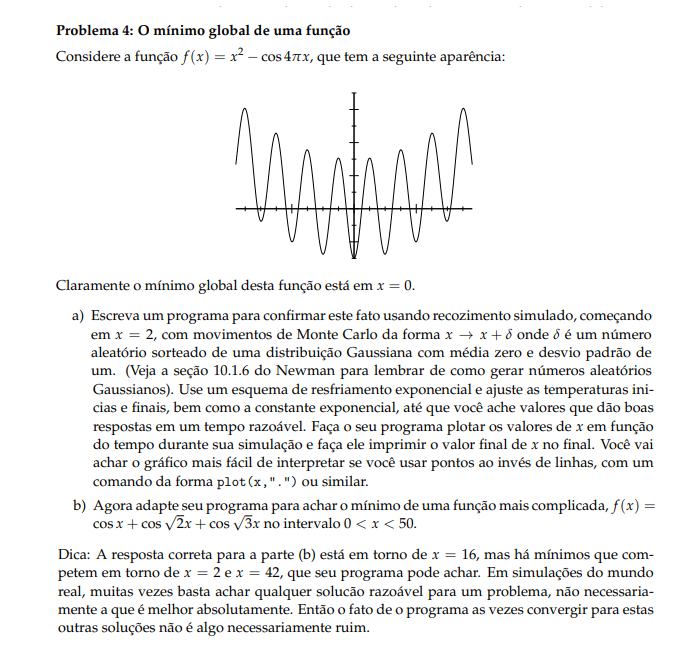

In [6]:
from random import random
from numpy import log, sqrt

sig = 1.0

def rth(z1,z2):
    r = sqrt(-2*(sig**2)*log(1-z1))
    th = 2*pi*z2
    return r,th

def xy(r,th):
    x, y = r*cos(th), r*sin(th)
    return x,y

def gaussiano():
    z1, z2 = random(), random()
    r, th = rth(z1,z2)
    x,y = xy(r,th)
    return x


In [7]:

Tmax = 1
Tmin = 1e-3
tau = 1000000
x0 = 2

def f(x):
    return x**2 - cos(4*pi*x)

fx = f(x0)
t = 0
T = Tmax
x = x0

while T>Tmin:
    
    t+=1
    T = Tmax*exp(-t/tau)

    x1 = x
    fx1 = fx
    r = gaussiano()
    x += r
    fx = f(x)
    
    delta_fx = fx - fx1

    if random()>exp(-delta_fx/T):
        x = x1
        fx = fx1

print(x)

-0.00020544459102936428


In [9]:
Tmax = 1
Tmin = 1e-3
tau = 10000
x0 = 2

def f(x):
    if x>0 and x<=50:
        return cos(x) + cos(sqrt(2)*x) + cos(sqrt(3)*x)
    else:
        return 1e5
fx = f(x0)
t = 0
T = Tmax
x = x0

while T>Tmin:
    
    t+=1
    T = Tmax*exp(-t/tau)

    x1 = x
    fx1 = fx
    r = gaussiano()
    x += r
    fx = f(x)
    
    delta_fx = fx - fx1

    if random()>exp(-delta_fx/T):
        x = x1
        fx = fx1

print(x)

15.964940503108886
